In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/Whiteaway/data.csv'
df= pd.read_csv(path, low_memory=False, encoding= 'unicode_escape')

In [ ]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,12/9/2011 12:50,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,12/9/2011 12:50,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,12/9/2011 12:50,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,12/9/2011 12:50,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12/9/2011 12:50,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


#Data Analytics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
452631,575367,85199S,SMALL HANGING IVORY/RED WOOD BIRD,24,11/9/2011 15:05,0.42,15114.0,United Kingdom
140019,548373,21900,"KEY FOB , SHED",1,3/30/2011 16:34,1.63,NaN,United Kingdom
408743,572025,23344,JUMBO BAG 50'S CHRISTMAS,10,10/20/2011 11:30,2.08,17651.0,United Kingdom
116717,546304,22252,BIRDCAGE DECORATION TEALIGHT HOLDER,6,3/10/2011 15:52,1.25,14077.0,United Kingdom
82670,543246,20831,GOLD PHOTO FRAME,1,2/4/2011 14:14,2.10,17315.0,United Kingdom


##Missing Values

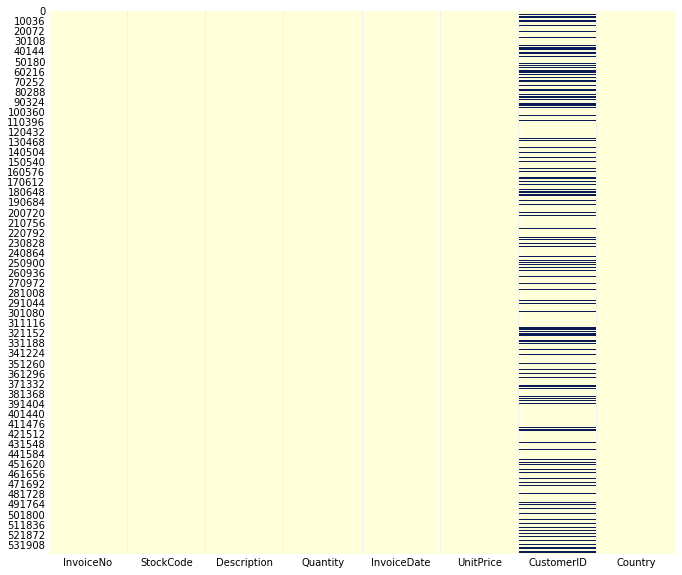

In [ ]:

plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), cbar = False, cmap = 'YlGnBu')

In [ ]:
##It seems that there are

##Statistics about missing values.



In [ ]:
colstats = {}
for col in df.columns:
#     print("{} has  {}  null entries ({:.1f}%) and  {}  unique entries ({:.1f}%)".format(col,
#                 dat[col].isnull().sum(),dat[col].isnull().sum()*100/dat.shape[0],
#                 len(dat[col].unique()),len(dat[col].unique())*100/dat.shape[0]))
    colstats[col] = [df[col].isnull().sum(),df[col].isnull().sum()*100/df.shape[0],
                len(df[col].unique()),len(df[col].unique())*100/df.shape[0]]

stats_col = pd.DataFrame(colstats.values(), index = colstats.keys(),  columns = ['Number of Null','% of Null','Number of Unique','% of Unique'])
pd.set_option('precision',2)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
print(stats_col)

             Number of Null  % of Null  Number of Unique  % of Unique
InvoiceNo                 0        0.0             25900          4.8
StockCode                 0        0.0              4070          0.8
Description            1454        0.3              4224          0.8
Quantity                  0        0.0               722          0.1
InvoiceDate               0        0.0             23260          4.3
UnitPrice                 0        0.0              1630          0.3
CustomerID           135080       24.9              4373          0.8
Country                   0        0.0                38          0.0


##Understanding the value counts of variables

In [ ]:
df['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
13391.0       1
16579.0       1
13366.0       1
17763.0       1
17846.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [ ]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Dotcomgiftshop Gift Voucher £100.00       1
dotcom sales                              1
PINK ALLIUM  ARTIFICIAL FLOWER            1
wet boxes                                 1
wrongly marked. 23343 in box              1
Name: Description, Length: 4223, dtype: int64

##Most of the transaction is from UK

In [ ]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

It seems that the sales in UK are dominant. How about the situation in total value.

,sum
Country,
United Kingdom,4263829
Netherlands,200128
EIRE,142637
Germany,117448
France,110480
Australia,83653
Sweden,35637
Switzerland,30325
Spain,26824


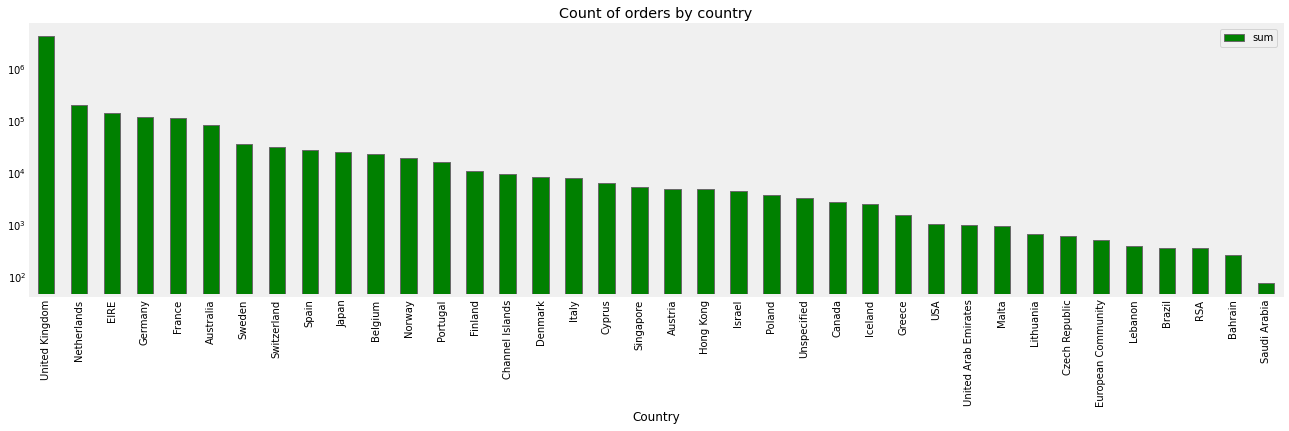

In [ ]:
#number of transactions vs country

fig,ax = plt.subplots(1,1,figsize=(20,5))
stats_country = df.groupby(['Country']).Quantity.agg([np.sum])
stats_country.sort_values(by='sum',ascending=False).plot(kind='bar',ax=ax, color='green').set_title('Count of orders by country')
plt.yscale('log')
plt.grid()

stats_country.sort_values(by='sum',ascending=False).head(10)

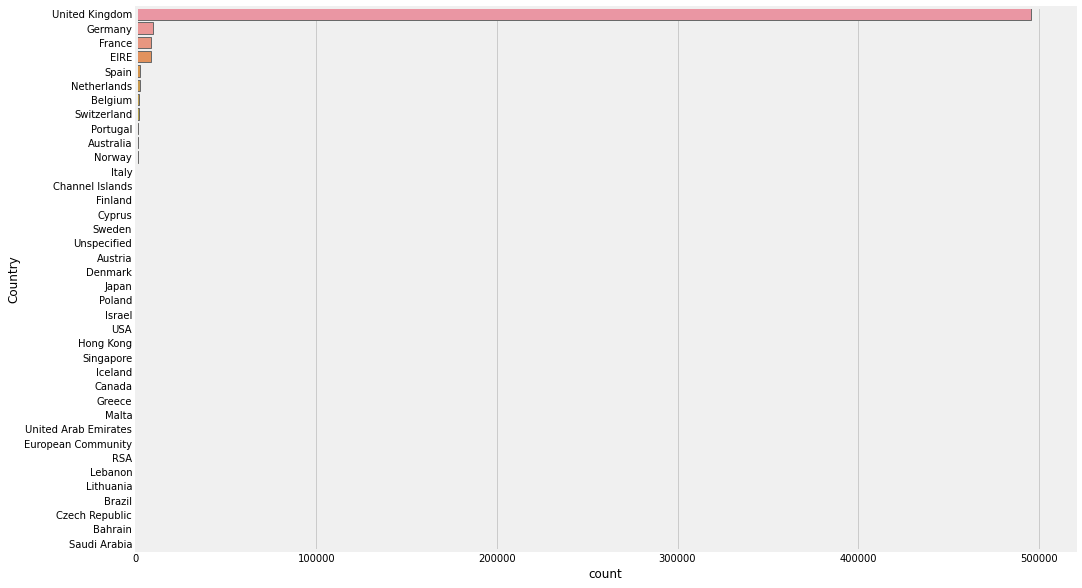

In [ ]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Country', data = df, order = df['Country'].value_counts().index)

,sum,mean
Country,,
Netherlands,284661.5,120.1
Australia,137077.3,108.9
Japan,35340.6,98.7
Sweden,36595.9,79.2
Denmark,18768.1,48.2


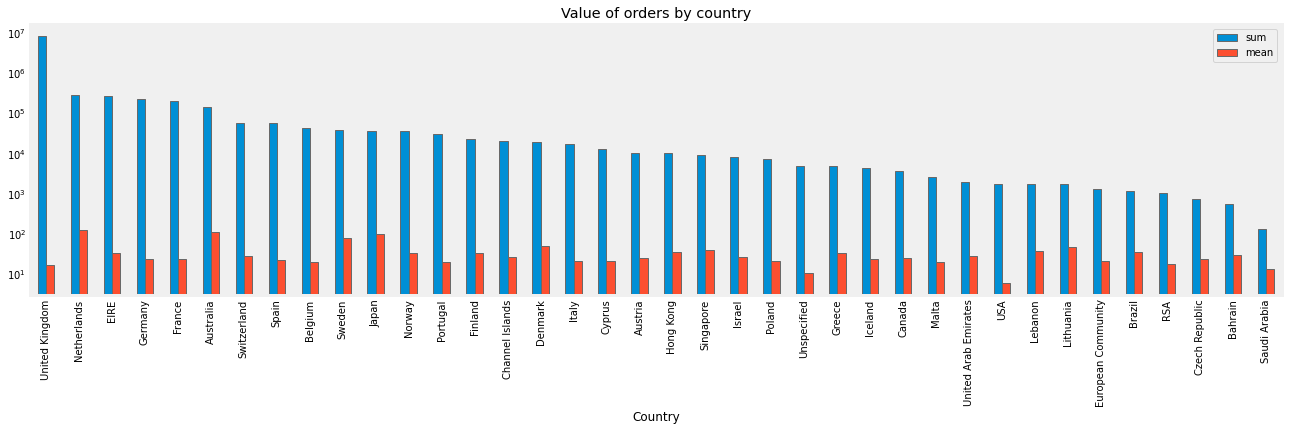

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(20,5))
dfnew = df.copy()
dfnew['Value'] = dfnew['Quantity']*dfnew['UnitPrice']
stats_country = dfnew.groupby(['Country']).Value.agg([np.sum, np.mean])
stats_country.sort_values(by='sum',ascending=False).plot(kind='bar',ax=ax).set_title('Value of orders by country')
plt.yscale("log")
plt.grid()

stats_country.sort_values(by='mean',ascending=False).head()

##There are negative values for quantity and unit price

In [ ]:

df['Quantity'].value_counts()

 1       148227
 2        81829
 12       61063
 6        40868
 4        38484
          ...  
 1287         1
-5368         1
 267          1
-244          1
 512          1
Name: Quantity, Length: 722, dtype: int64

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.0,541909.0,406829.0
mean,9.6,4.6,15287.7
std,218.1,96.8,1713.6
min,-80995.0,-11062.1,12346.0
25%,1.0,1.2,13953.0
50%,3.0,2.1,15152.0
75%,10.0,4.1,16791.0
max,80995.0,38970.0,18287.0


Note that there are negative values in both UnitPrice and Quantity. What are these? These can be cancelled transactions or returns.

##Creation of new feature: value = quantity * unit price

In [ ]:
#A new dataframe with value (the cost paid by customer in each transaction)
dfnew = df.copy()
dfnew['Value'] = dfnew['Quantity']*dfnew['UnitPrice']
dfnew.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.5,17850.0,United Kingdom,15.3
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.4,17850.0,United Kingdom,20.3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.8,17850.0,United Kingdom,22.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.4,17850.0,United Kingdom,20.3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.4,17850.0,United Kingdom,20.3


##Dropping null values and duplicates

In [ ]:
#Drop the null values for CustomerID
dfnew.dropna(axis = 0, subset = ['CustomerID'], inplace = True)
print('Dataframe dimensions:', dfnew.shape)

Dataframe dimensions: (406829, 9)


In [ ]:
#Drop the duplicates
print('Duplicates: {}'.format(dfnew.duplicated().sum()))
dfnew.drop_duplicates(inplace = True)

Duplicates: 5225


In [ ]:
pd.DataFrame([{'products': len(dfnew['StockCode'].value_counts()),
               'transactions': len(dfnew['InvoiceNo'].value_counts()),
               'customers': len(dfnew['CustomerID'].value_counts()),
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3684,22190,4372


It can be seen that the data concern 4372 users and that they bought 3684 different products. The total number of transactions carried out about 22000.

In [ ]:
#the number of products purchased in every transaction:
temp = dfnew.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket[:10].sort_values('CustomerID')

,CustomerID,InvoiceNo,Number of products
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
5,12347.0,556201,18
6,12347.0,562032,22
7,12347.0,573511,47
8,12347.0,581180,11
9,12348.0,539318,17


##Statistics of cancelled transactions and dropping them

We calculate the percentage of cancelled transactions.

In [ ]:
nb_products_per_basket['order_canceled'] = nb_products_per_basket['InvoiceNo'].apply(lambda x:int('C' in x))
display(nb_products_per_basket[:5])

,CustomerID,InvoiceNo,Number of products,order_canceled
0,12346.0,541431,1,0
1,12346.0,C541433,1,1
2,12347.0,537626,31,0
3,12347.0,542237,29,0
4,12347.0,549222,24,0


In [ ]:

n1 = nb_products_per_basket['order_canceled'].sum()
n2 = nb_products_per_basket.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))


Number of orders canceled: 3654/22190 (16.47%) 


I create a new data set without cancellations  to make RMF analysis.
dfwc = df without cancellations


In [ ]:

dfwc = dfnew[~dfnew["InvoiceNo"].str.contains("C", na=False)]
dfwc.shape

(392732, 9)

In [ ]:
dfwc.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.5,17850.0,United Kingdom,15.3
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.4,17850.0,United Kingdom,20.3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.8,17850.0,United Kingdom,22.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.4,17850.0,United Kingdom,20.3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.4,17850.0,United Kingdom,20.3


In [ ]:
dfwc.describe()

,Quantity,UnitPrice,CustomerID,Value
count,392732.0,392732.0,392732.0,392732.0
mean,13.2,3.1,15287.7,22.6
std,181.6,22.2,1713.6,311.1
min,1.0,0.0,12346.0,0.0
25%,2.0,1.2,13955.0,4.9
50%,6.0,1.9,15150.0,12.4
75%,12.0,3.8,16791.0,19.8
max,80995.0,8142.8,18287.0,168469.6


Discarding rows with 0 values.

There are 40 rows with Value 0, let's get rid of them.

In [ ]:

dfwc = dfwc[(dfwc['Value'] > 0)]

In [ ]:
dfwc.shape

(392692, 9)

##Most of the purchases are less than 20 sterling

<Figure size 5760x5760 with 0 Axes>

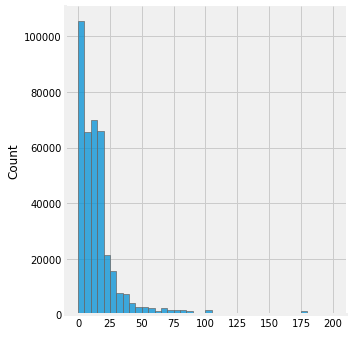

In [ ]:
df1 = dfwc[(dfwc['Value'] < 200)]

plt.figure(figsize = (80, 80))
ax = sns.displot(df1['Value'], binwidth=5)
ax.set(xlabel=' ')

#RMF Analysis

In [ ]:
dfwc["InvoiceDate"].index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            541899, 541900, 541901, 541902, 541903, 541904, 541905, 541906,
            541907, 541908],
           dtype='int64', length=392692)

In [ ]:
Date=[]
for i in dfwc["InvoiceDate"].index:
    a,b=dfwc["InvoiceDate"][i].split()
    Date.append(a)

In [ ]:
#change to datetime
Date=[d.date() for d in pd.to_datetime(Date)]
#add this date to your data
dfwc["Date"]=Date
dfwc.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Value,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.5,17850.0,United Kingdom,15.3,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.4,17850.0,United Kingdom,20.3,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.8,17850.0,United Kingdom,22.0,2010-12-01


In [ ]:
today_date = datetime.date(2011, 12, 11)
today_date

datetime.date(2011, 12, 11)

##Creating recency, frequency and monetary values for each customer.

In [ ]:
lastdate = today_date


recent = (lastdate - dfwc.groupby("CustomerID")["Date"].last()).dt.days
frequent = dfwc.groupby("CustomerID")["Date"].count()
monetary = dfwc.groupby("CustomerID")["Value"].sum()

In [ ]:
recent_quantile = recent.quantile(q=[0.25,0.5,0.75])
recent_quantile

0.2    19.0
0.5    52.0
0.8   143.8
Name: Date, dtype: float64

In [ ]:
frequent_quantile = frequent.quantile(q=[0.25,0.5,0.75])
frequent_quantile

0.2   17.0
0.5   41.0
0.8   98.0
Name: Date, dtype: float64

In [ ]:
monetary_quantile = monetary.quantile(q=[0.25,0.5,0.75])
monetary_quantile

0.2    306.5
0.5    668.6
0.8   1660.6
Name: Value, dtype: float64

In [ ]:
rfm = pd.DataFrame(data=[recent,frequent,monetary])
rfm = rfm.transpose()
rfm.columns = ["recent","frequent","monetary"]
rfm

,recent,frequent,monetary
CustomerID,,,
12346.0,327.0,1.0,77183.6
12347.0,4.0,182.0,4310.0
12348.0,77.0,31.0,1797.2
12349.0,20.0,73.0,1757.5
12350.0,312.0,17.0,334.4
...,...,...,...
18280.0,279.0,10.0,180.6
18281.0,182.0,7.0,80.8
18282.0,9.0,12.0,178.0


In [ ]:
rfm["monetary"].describe()

count     4338.0
mean      2048.7
std       8985.2
min          3.8
25%        306.5
50%        668.6
75%       1660.6
max     280206.0
Name: monetary, dtype: float64

##k- means clustering on rmf dataset

In [ ]:
def get_kmeans_wcss(data, n_limit=15):
    wcss = [] #Within cluster sum of squares (WCSS)
    for i in range(1,n_limit):
        km = KMeans(init='k-means++', n_clusters=i, n_init=10)
        km.fit(data)
        wcss.append(km.inertia_)
    plt.title("Elbow Method")
    plt.plot(range(1, n_limit), wcss)
    plt.xlabel("Number of clusters")
    plt.ylabel("WCSS")
    return wcss

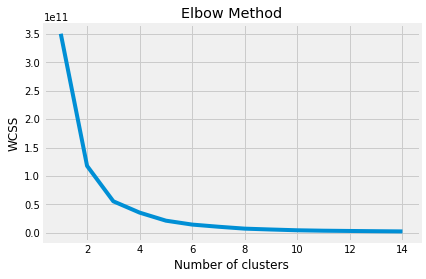

In [ ]:
_ = get_kmeans_wcss(rfm, n_limit=15)

In [ ]:
kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=42)
clustered_customer = kmeans.fit_predict(rfm)

##Analysing Clusters

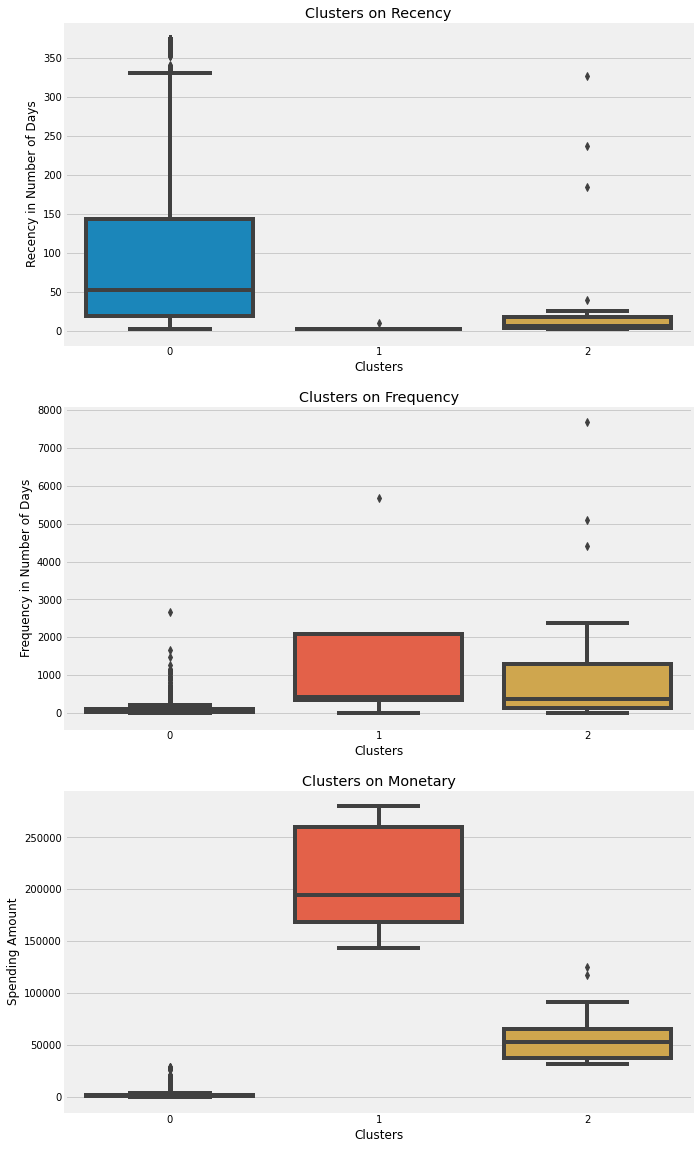

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,20))
sns.boxplot(clustered_customer,recent, ax=ax[0])
ax[0].set(xlabel="Clusters", ylabel = "Recency in Number of Days")
ax[0].title.set_text('Clusters on Recency')
sns.boxplot(clustered_customer,frequent, ax=ax[1])
ax[1].set(xlabel="Clusters", ylabel = "Frequency in Number of Days")
ax[1].title.set_text('Clusters on Frequency')
sns.boxplot(clustered_customer,monetary, ax=ax[2])
ax[2].set(xlabel="Clusters", ylabel = "Spending Amount")
ax[2].title.set_text('Clusters on Monetary')

Cluster 0 : low recency, low frequency, low monetary value

Cluster 1 : high recency, high frequncy, high monetary value

Cluster 2 : high recency, high frequency, decent monetary value

In [ ]:
rfm['Clusters'] = clustered_customer
rfm.Clusters.value_counts()

0    4307
2      26
1       5
Name: Clusters, dtype: int64

Unfortunately, most of customers are in Cluster 0. We can do some marketing strategies to the customers in Cluster 1 and 2.

In [ ]:
rfm

,recent,frequent,monetary,Clusters
CustomerID,,,,
12346.0,327.0,1.0,77183.6,2
12347.0,4.0,182.0,4310.0,0
12348.0,77.0,31.0,1797.2,0
12349.0,20.0,73.0,1757.5,0
12350.0,312.0,17.0,334.4,0
...,...,...,...,...
18280.0,279.0,10.0,180.6,0
18281.0,182.0,7.0,80.8,0
18282.0,9.0,12.0,178.0,0


##KNeighbor Classifier for rmf dataset

In [ ]:
X = rfm.iloc[:, :-1].values
y = rfm.iloc[:, -1].values


In [ ]:
#Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=3,
                     weights='uniform')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1076    1]
 [   0    8]]


0.9990783410138249

##DecisionTree Classifier for rmf dataset

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1077    0]
 [   0    8]]


1.0

#Apriori Algorithm

We will make a recommender by associative learning: apriori.

In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=1c4d6cd90a96de99086d748a766448f6849ac50cfa815f7634547363e14c21f9
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
! pip install fpgrowth_py

In [ ]:
basket = dfwc.groupby(['InvoiceNo','CustomerID']).agg({'StockCode': lambda s: list(set(s))})
basket.head(10)

,,StockCode
InvoiceNo,CustomerID,
536365,17850.0,"[22752, 21730, 84029E, 85123A, 71053, 84406B, ..."
536366,17850.0,"[22632, 22633]"
536367,13047.0,"[21754, 21755, 22622, 84969, 22749, 21777, 223..."
536368,13047.0,"[22960, 22913, 22912, 22914]"
536369,13047.0,[21756]
536370,12583.0,"[22661, 21724, 10002, 22726, POST, 22900, 2103..."
536371,13748.0,[22086]
536372,17850.0,"[22632, 22633]"
536373,17850.0,"[82483, 21871, 21071, 21068, 22752, 20679, 217..."


In [ ]:
basket.shape

(18532, 1)

In [ ]:
l = []
for i in list(basket.iloc[:, 0]):
  l.append(len(i))
max(l)

541

In [ ]:
transactions = list(basket.iloc[:, 0])

In [ ]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

In [ ]:
results = list(rules)

In [ ]:
results

[RelationRecord(items=frozenset({'15056N', '15056BL'}), support=0.008687675372328944, ordered_statistics=[OrderedStatistic(items_base=frozenset({'15056BL'}), items_add=frozenset({'15056N'}), confidence=0.5532646048109965, lift=27.12460226549573), OrderedStatistic(items_base=frozenset({'15056N'}), items_add=frozenset({'15056BL'}), confidence=0.42592592592592593, lift=27.124602265495735)]),
 RelationRecord(items=frozenset({'15056P', '15056BL'}), support=0.003669328728685517, ordered_statistics=[OrderedStatistic(items_base=frozenset({'15056BL'}), items_add=frozenset({'15056P'}), confidence=0.23367697594501716, lift=32.07779050528191), OrderedStatistic(items_base=frozenset({'15056P'}), items_add=frozenset({'15056BL'}), confidence=0.5037037037037037, lift=32.07779050528191)]),
 RelationRecord(items=frozenset({'15056BL', '20679'}), support=0.007446578890567667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'15056BL'}), items_add=frozenset({'20679'}), confidence=0.474226804123711

In [ ]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

##results

In [ ]:
resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,15056BL,15056N,0.0,0.6,27.1
1,15056BL,15056P,0.0,0.2,32.1
2,15056BL,20679,0.0,0.5,32.5
3,15056BL,85014B,0.0,0.2,14.5
4,15056N,15056P,0.0,0.2,31.2
...,...,...,...,...,...
2466,85099B,85099C,0.0,0.2,6.5
2467,85099B,85099F,0.0,0.3,7.3
2468,85099C,85099F,0.0,0.3,9.0
2469,85150,85152,0.0,0.4,11.4


In [ ]:
resultsinDataFrame.nlargest(n = 10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
457,21088,21096,0.0,0.8,214.7
1005,22021,85206A,0.0,0.9,157.4
2340,23373,23436,0.0,0.7,148.8
2353,23498,23552,0.0,0.8,140.2
2470,85183A,85183B,0.0,0.8,138.1
651,21394,21395,0.0,0.6,137.6
1462,22520,22521,0.0,0.7,137.1
1655,22677,22685,0.0,0.5,135.9
448,21084,21090,0.0,0.8,134.9
1659,22680,22682,0.0,0.6,133.7


In [ ]:
resultsinDataFrame.shape

(2471, 5)

What are the descriptions of the first element?

People who buy 21088 (SET/6 FRUIT SALAD PAPER CUPS) are also buying 21096 (SET/6 FRUIT SALAD PAPER PLATES)

People who buy 22021 (BLUE FELT EASTER EGG BASKET) are also buying 85206A (CREAM FELT EASTER EGG BASKET)

People who buy 23373 (VINTAGE CHRISTMAS PAPER GIFT BAG) are also buying 23436 (GIFT BAG LARGE VINTAGE CHRISTMAS)

This algorithm also used as a marketing technique for discounts on most selling product combinations.


##second Apriori Algorithm with different hyperparameters.

In [ ]:
rules2 = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 3, max_length = 3)
results2 = list(rules2)

In [ ]:
results2

[RelationRecord(items=frozenset({'15056N', '15056BL'}), support=0.008687675372328944, ordered_statistics=[OrderedStatistic(items_base=frozenset({'15056BL'}), items_add=frozenset({'15056N'}), confidence=0.5532646048109965, lift=27.12460226549573), OrderedStatistic(items_base=frozenset({'15056N'}), items_add=frozenset({'15056BL'}), confidence=0.42592592592592593, lift=27.124602265495735)]),
 RelationRecord(items=frozenset({'15056P', '15056BL'}), support=0.003669328728685517, ordered_statistics=[OrderedStatistic(items_base=frozenset({'15056BL'}), items_add=frozenset({'15056P'}), confidence=0.23367697594501716, lift=32.07779050528191), OrderedStatistic(items_base=frozenset({'15056P'}), items_add=frozenset({'15056BL'}), confidence=0.5037037037037037, lift=32.07779050528191)]),
 RelationRecord(items=frozenset({'15056BL', '20679'}), support=0.007446578890567667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'15056BL'}), items_add=frozenset({'20679'}), confidence=0.474226804123711

In [ ]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame2 = pd.DataFrame(inspect(results2), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

##results

In [ ]:
resultsinDataFrame2.nlargest(n = 10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
457,21088,21096,0.0,0.8,214.7
5594,22520,22521,0.0,0.5,164.9
1005,22021,85206A,0.0,0.9,157.4
2340,23373,23436,0.0,0.7,148.8
5595,22520,22523,0.0,0.5,145.3
2353,23498,23552,0.0,0.8,140.2
2470,85183A,85183B,0.0,0.8,138.1
651,21394,21395,0.0,0.6,137.6
1462,22520,22521,0.0,0.7,137.1
1655,22677,22685,0.0,0.5,135.9


#FpGrowth Algorithm

In [ ]:
from fpgrowth_py import fpgrowth
import time
x=time.time()
freqItemSet, rules = fpgrowth(basket['StockCode'].values, minSupRatio=0.005, minConf=0.3)
y=time.time()



In [ ]:
association=pd.DataFrame(rules,columns =['basket','next_product','proba'])
association=association.sort_values(by='proba',ascending=False)
print('Dimensions of the association table are : ', association.shape)
print('time to execute in seconds : ',y-x, ' s.')
print('Number of rules generated : ', len(rules))
association.head(10)

Dimensions of the association table are :  (8301, 3)
time to execute in seconds :  537.2628910541534  s.
Number of rules generated :  8301


,basket,next_product,proba
269,"{22920, 22919, 22917, 22921, 22916}",{22918},1.0
492,"{22916, 22921, 22919, 22917}",{22918},1.0
378,"{22916, 22920, 22917, 22921}",{22918},1.0
379,"{22918, 22920, 22917, 22921}",{22916},1.0
300,"{22916, 22920, 22919, 22921}",{22918},1.0
164,"{22920, 22919, 22917, 22921}",{22918},1.0
271,"{22920, 22919, 22921, 22916, 22918}",{22917},1.0
270,"{22920, 22919, 22917, 22921, 22918}",{22916},1.0
1166,"{22697, 23172, 23170}",{23171},1.0
1009,"{23172, 23170, 23174}",{23171},1.0


In [ ]:
association.head(10)

,basket,next_product,proba
269,"{22920, 22919, 22917, 22921, 22916}",{22918},1.0
492,"{22916, 22921, 22919, 22917}",{22918},1.0
378,"{22916, 22920, 22917, 22921}",{22918},1.0
379,"{22918, 22920, 22917, 22921}",{22916},1.0
300,"{22916, 22920, 22919, 22921}",{22918},1.0
164,"{22920, 22919, 22917, 22921}",{22918},1.0
271,"{22920, 22919, 22921, 22916, 22918}",{22917},1.0
270,"{22920, 22919, 22917, 22921, 22918}",{22916},1.0
1166,"{22697, 23172, 23170}",{23171},1.0
1009,"{23172, 23170, 23174}",{23171},1.0


In [ ]:
def compute_next_best_product(basket_el):
    for k in basket_el:
            k={k}
            if len(association[association['basket']==k].values) !=0:
                next_pdt=list(association[association['basket']==k]['next_product'].values[0])[0]
                if next_pdt not in basket_el :
                    proba=association[association['basket']==k]['proba'].values[0]
                    return(next_pdt,proba)

    return(0,0)

In [ ]:
def find_next_product(basket):
    n=basket.shape[0]
    list_next_pdt=[]
    list_proba=[]
    for i in range(n):
        el=set(basket['StockCode'][i])
        if len(association[association['basket']==el].values) !=0:
            next_pdt=list(association[association['basket']==el]['next_product'].values[0])[0]
            proba=association[association['basket']==el]['proba'].values[0]
            list_next_pdt.append(next_pdt)
            list_proba.append(proba)
        elif len(association[association['basket']==el].values) ==0:
            next_pdt,proba= compute_next_best_product(basket['StockCode'][i])
            list_next_pdt.append(next_pdt)
            list_proba.append(proba)

    return(list_next_pdt, list_proba)

##Results and recomendations

In [ ]:
a=time.time()
list_next_pdt, list_proba= find_next_product(basket)
b=time.time()
print(b-a)
basket['Recommended Product']=list_next_pdt
basket['Probability']=list_proba
basket.head()

193.7388608455658


,,StockCode,Recommended Product,Probability
InvoiceNo,CustomerID,,,
536365,17850.0,"[22752, 21730, 84029E, 85123A, 71053, 84406B, ...",22111,0.3
536366,17850.0,"[22632, 22633]",22865,0.6
536367,13047.0,"[21754, 21755, 22622, 84969, 22749, 21777, 223...",22750,0.6
536368,13047.0,"[22960, 22913, 22912, 22914]",22961,0.4
536369,13047.0,[21756],21754,0.6


In [ ]:
basket=basket.rename(columns = {'StockCode': 'Customer basket'})
data_stock=dfwc.drop_duplicates(subset ="StockCode", inplace = False)
prices=[]
description_list=[]
for i in range(basket.shape[0]):
    stockcode=basket['Recommended Product'][i]
    probability= basket['Probability'][i]
    if stockcode != 0:
        unitprice=data_stock[data_stock['StockCode']==stockcode]['UnitPrice'].values[0]
        description=data_stock[data_stock['StockCode']==stockcode]['Description'].values[0]
        estim_price=unitprice*probability
        prices.append(estim_price)
        description_list.append(description)

    else :
        prices.append(0)
        description_list.append('Null')



basket['Price estimation']=prices
basket['Product description']=description_list
basket = basket.reindex(columns=['Customer basket','Recommended Product','Product description','Probability','Price estimation'])
basket.head()

,,Customer basket,Recommended Product,Product description,Probability,Price estimation
InvoiceNo,CustomerID,,,,,
536365,17850.0,"[22752, 21730, 84029E, 85123A, 71053, 84406B, ...",22111,SCOTTIE DOG HOT WATER BOTTLE,0.3,1.6
536366,17850.0,"[22632, 22633]",22865,HAND WARMER OWL DESIGN,0.6,1.0
536367,13047.0,"[21754, 21755, 22622, 84969, 22749, 21777, 223...",22750,FELTCRAFT PRINCESS LOLA DOLL,0.6,2.2
536368,13047.0,"[22960, 22913, 22912, 22914]",22961,JAM MAKING SET PRINTED,0.4,0.5
536369,13047.0,[21756],21754,HOME BUILDING BLOCK WORD,0.6,3.4


In [ ]:
print('On average, the recommendation system can predict in ',basket['Probability'].mean() *100,  '% of the cases the next product that the customer will buy.')

On average, the recommendation system can predict in  39.159206675686946 % of the cases the next product that the customer will buy.


In [ ]:
print('With only 1 single product proposed, the recommendation system can generate a turnover in this case up to : ', round(basket['Price estimation'].sum()), ' sterling.')

With only 1 single product proposed, the recommendation system can generate a turnover in this case up to :  20486  sterling.


Among a product catalog of more than 3000 items, a simple model based on association rules can predict in 40% of the cases the next product that the customer will buy and thus generate significant additional revenue.

The advantage of this model is that it offers very good accuracy while being both easy to implement and explainable. The results of the Fp Growth model are understandable, for example; if you know that most of the time your customers buy product A and product B together, you will see it immediately in your association table.

Store the dataframes you created for association learning

In [ ]:
association.to_csv(r'/content/drive/My Drive/Whiteaway/file.csv', index = False)

In [ ]:
resultsinDataFrame.to_csv(r'/content/drive/My Drive/Whiteaway/fileapriori0.csv', index = False)

In [ ]:
resultsinDataFrame2.to_csv(r'/content/drive/My Drive/Whiteaway/fileapriori.csv', index = False)

# Forecasting by using Prophet

In [ ]:
dfwc.InvoiceDate = pd.to_datetime(dfwc.InvoiceDate)
dfwc2 = dfwc.copy()

In [ ]:
dfwc2.index = pd.DatetimeIndex(dfwc2.InvoiceDate)

In [ ]:
p = dfwc2.resample('d').size()
p = p.to_frame(name='number of transactions')

In [ ]:
p = p.reset_index()

##Number of transactions wrt different time measures

Text(0, 0.5, 'Number of transactions')

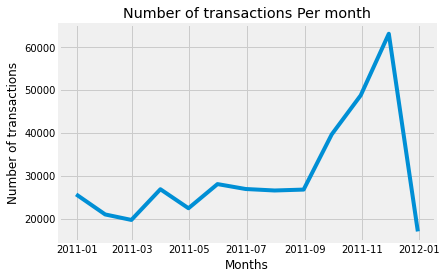

In [ ]:
plt.plot(dfwc2.resample('m').size())
plt.title('Number of transactions Per month')
plt.xlabel('Months')
plt.ylabel('Number of transactions')

Text(0, 0.5, 'Number of transactions')

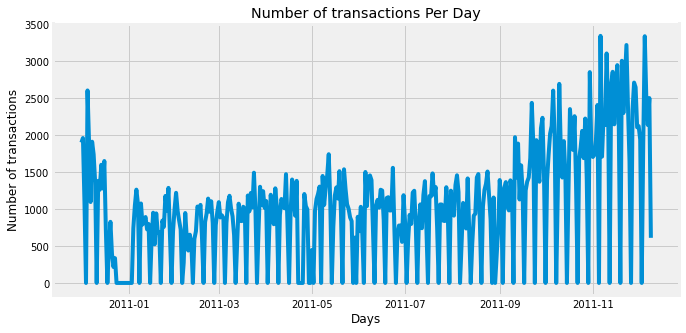

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(dfwc2.resample('d').size())
plt.title('Number of transactions Per Day')
plt.xlabel('Days')
plt.ylabel('Number of transactions')

Text(0, 0.5, 'Number of transactions')

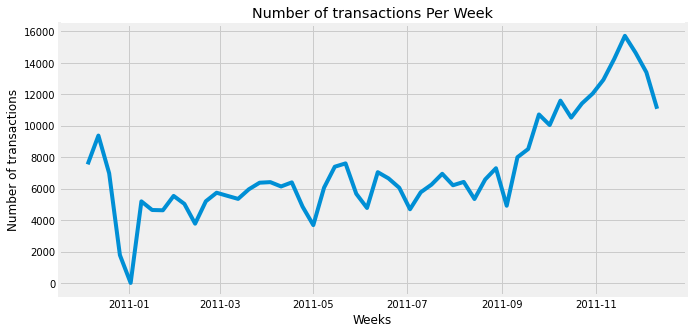

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(dfwc2.resample('W').size())
plt.title('Number of transactions Per Week')
plt.xlabel('Weeks')
plt.ylabel('Number of transactions')

In [ ]:
!pip install fbprophet

In [ ]:
from fbprophet import Prophet
prophet_df = p.rename(columns={'InvoiceDate':'ds', 'number of transactions':'y'})

In [ ]:
prophet_df.head()

,ds,y
0,2010-12-01,1898
1,2010-12-02,1959
2,2010-12-03,1086
3,2010-12-04,0
4,2010-12-05,2602


In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecast, trends and some insights

In [ ]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-12-01,723.6,387.0,1462.2,723.6,723.6,211.3,211.3,211.3,211.3,211.3,211.3,0.0,0.0,0.0,934.9
1,2010-12-02,724.2,588.9,1640.8,724.2,724.2,414.8,414.8,414.8,414.8,414.8,414.8,0.0,0.0,0.0,1139.0
2,2010-12-03,724.7,179.1,1185.9,724.7,724.7,-51.7,-51.7,-51.7,-51.7,-51.7,-51.7,0.0,0.0,0.0,673.1
3,2010-12-04,725.3,-819.9,191.5,725.3,725.3,-1040.4,-1040.4,-1040.4,-1040.4,-1040.4,-1040.4,0.0,0.0,0.0,-315.1
4,2010-12-05,725.9,258.3,1371.8,725.9,725.9,111.4,111.4,111.4,111.4,111.4,111.4,0.0,0.0,0.0,837.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,2012-01-04,2339.9,2044.3,3091.0,2328.6,2350.1,211.3,211.3,211.3,211.3,211.3,211.3,0.0,0.0,0.0,2551.2
400,2012-01-05,2349.3,2219.7,3254.8,2337.3,2360.1,414.8,414.8,414.8,414.8,414.8,414.8,0.0,0.0,0.0,2764.2
401,2012-01-06,2358.8,1810.5,2840.9,2345.9,2370.2,-51.7,-51.7,-51.7,-51.7,-51.7,-51.7,0.0,0.0,0.0,2307.1
402,2012-01-07,2368.2,838.6,1881.9,2354.3,2380.3,-1040.4,-1040.4,-1040.4,-1040.4,-1040.4,-1040.4,0.0,0.0,0.0,1327.7


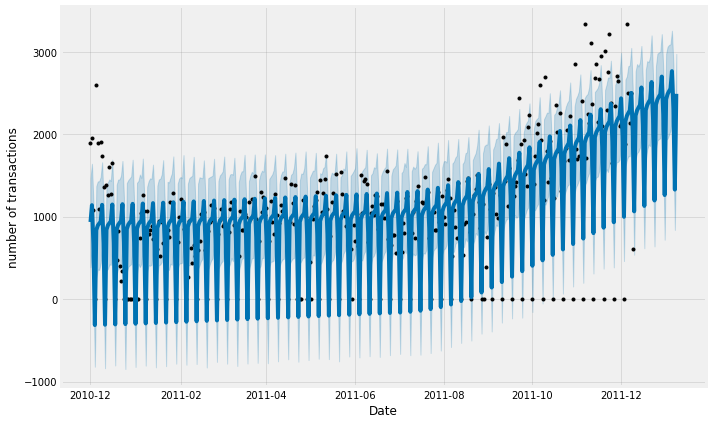

In [ ]:
figure = m.plot(forecast, xlabel='Date', ylabel='number of transactions')

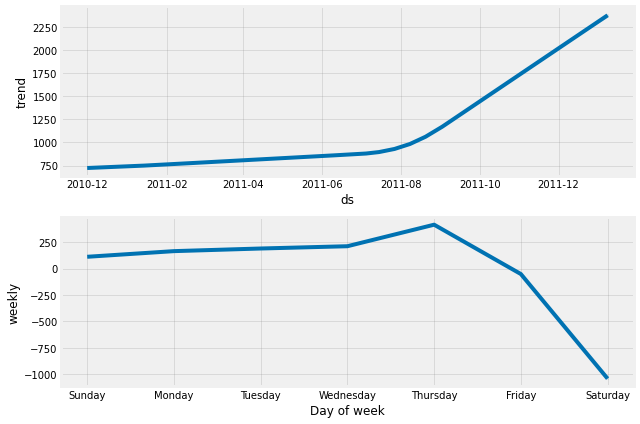

In [ ]:
figure3 = m.plot_components(forecast)

It is interesting to note that Thursdays have the maximum sale by volume.
Also, there are no transactions done on Saturdays. It is safe to assume that the store is closed on Saturdays. It seems that company’s performance is improving in terms of revenue and sales, but as we are provided with just one year of data, it is hard to claim this.
There might be a seasonal rise during the end of the year.

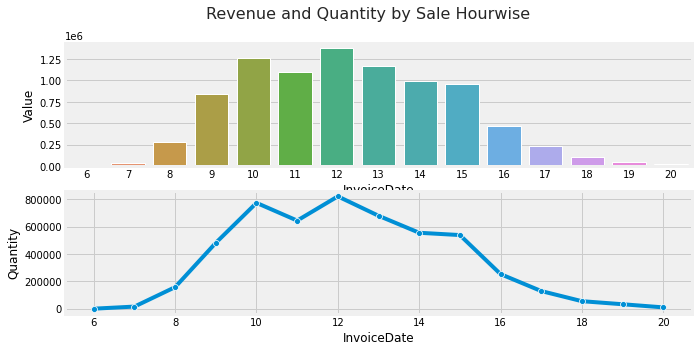

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(10,5))
sns.set_style("whitegrid")

day = dfwc[dfwc['Value']>=0][['InvoiceDate','Value','Quantity']]
day = day.groupby(day['InvoiceDate'].dt.hour)[['Value','Quantity']].sum()

sns.barplot(data = day, x=day.index, y='Value', alpha=1, ax=ax[0])
sns.lineplot(data = day, x=day.index, y='Quantity', marker='o', sort = False, ax=ax[1])
fig.suptitle('Revenue and Quantity by Sale Hourwise',fontsize=16)
#add_value_labels(ax[0])
plt.show()

We can see that the customers do tend to buy between 9:00 hrs - 13:00 hrs. Infact, ~51 % of the sales by revenue is done in these hours

Also, there are no transactions are done before 6:00 hrs and after 20:00 hrs. It can be assumed that the store usually opens for 14 hours between 6:00 hrs and 20:00 hrs.

# Regression models to predict the quantity in transactions.

##Frequency of most bought items itemcode/StockCode wise

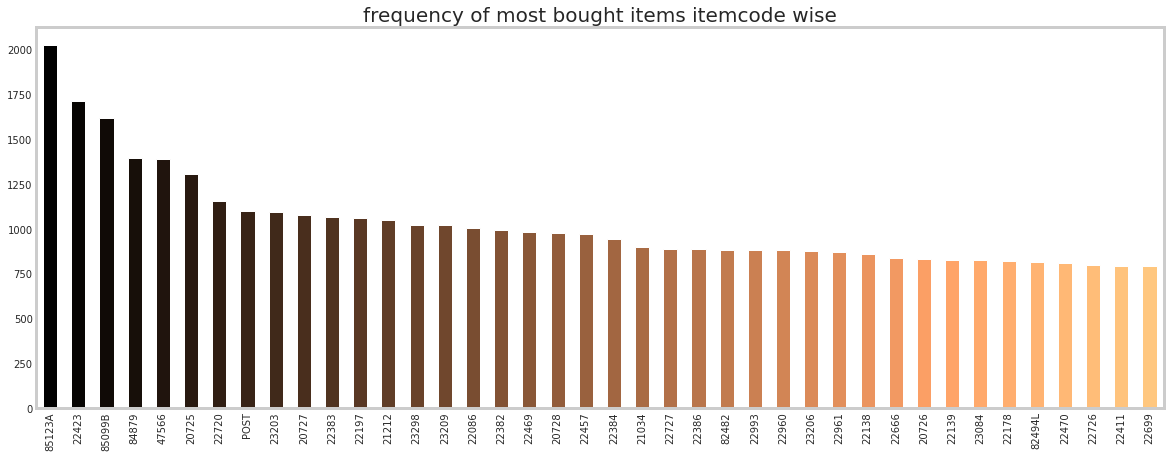

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
dfwc['StockCode'].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most bought items itemcode wise', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

##Creating a dataset with the first ten items purchased most frequently

In [ ]:
k = list(dfwc['StockCode'].value_counts().head(10).index)
dfwc_new = dfwc[dfwc['StockCode'].isin(k)]

In [ ]:
dfwc_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Value,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5,17850.0,United Kingdom,15.3,2010-12-01
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.7,13047.0,United Kingdom,54.1,2010-12-01
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583.0,France,54.0,2010-12-01
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.5,17850.0,United Kingdom,15.3,2010-12-01
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.5,17850.0,United Kingdom,15.3,2010-12-01


##Preprocessing the dataset

In [ ]:
X = dfwc_new[['StockCode', 'UnitPrice']]
X = X. to_numpy()
y = dfwc_new['Quantity']
y = y.to_numpy()
print(X)

[['85123A' 2.55]
 ['84879' 1.69]
 ['POST' 18.0]
 ...
 ['POST' 18.0]
 ['20725' 1.45]
 ['84879' 1.69]]


In [ ]:
dataset = dfwc_new[['StockCode', 'UnitPrice', 'Quantity']]
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 2].values

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("StockCode", OneHotEncoder(), [0])], remainder = 'passthrough')
X = ct.fit_transform(X)
X = X[:, 1:]

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[18.07 10.  ]
 [10.81  4.  ]
 [10.81  3.  ]
 ...
 [10.38 10.  ]
 [18.07 20.  ]
 [29.15 20.  ]]


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.01713128829975996
2913.1540011755683


##Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 9.68 10.  ]
 [ 5.74  4.  ]
 [ 5.74  3.  ]
 ...
 [ 7.99 10.  ]
 [ 9.68 20.  ]
 [10.5  20.  ]]


In [ ]:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.27109937754985436
2160.410377777504
